<a href="https://colab.research.google.com/github/Sudo-CHRIS-dev/MachineLearning/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset 1 : Car Insurance Data

- 1.) Kaggle
- 2.) The data has to do with car insurance
- 3.) if a customer has claimed his/her loan
- 4.) A row represents a person
- 5.) Classification
- 6.) 19 features
- 7.) 10000
- 8.) I currently see no challenges

# Dataset 2 : Adult income dataset

- 1.) Kaggle
- 2.) The data has to do with adult income
- 3.) Income
- 4.) A row represents a person
- 5.) Classification
- 6.) 16 features
- 7.) 48842
- 8.) I currently see no challenges

#Imports

In [263]:
# import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.compose import  make_column_selector, make_column_transformer
from sklearn.decomposition import PCA
#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [264]:
#Load data frame
FilePath = "/content/Car_Insurance_Claim.csv"
Insurance_df = pd.read_csv(FilePath)
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

#Cleaning and Visualization

##Delete unnecessary columns.

In [265]:
Insurance_df.drop(columns = ['ID'], inplace=True)

##Deleted duplicate rows.

In [266]:
# Let's checked for duplicate values
Insurance_df.duplicated().sum()

12

In [267]:
# We have duplicates so it's time to get rid of them
Insurance_df.drop_duplicates(inplace=True)

# now let's make sure they are gone
Insurance_df.duplicated().sum()

0

##Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [268]:
#Check for any inconsistent values in categorical columns.
objectcols = Insurance_df.select_dtypes('object').columns
# loop through the list of string columns
for column in objectcols:
  # print the value counts for the column
  print(Insurance_df[column].value_counts())
  # Print an empty line for readability
  print()

26-39    3062
40-64    2931
16-25    2005
65+      1990
Name: AGE, dtype: int64

female    5003
male      4985
Name: GENDER, dtype: int64

majority    9000
minority     988
Name: RACE, dtype: int64

0-9y      3519
10-19y    3298
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

high school    4151
university     3927
none           1910
Name: EDUCATION, dtype: int64

upper class      4335
middle class     2138
poverty          1804
working class    1711
Name: INCOME, dtype: int64

before 2015    6955
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64

sedan         9511
sports car     477
Name: VEHICLE_TYPE, dtype: int64



##Identified outliers.

In [269]:
#Check for any impossible values in numeric columns.
Insurance_df.describe(include='number')

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,9988.000000,9988.000000,9988.000000,9988.00000,9034.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,0.515813,0.697537,0.498698,0.689327,19873.85873,11694.598185,1.484581,0.239487,1.057369,0.312775
std,0.137688,0.459348,0.500023,0.462792,18923.83540,2818.004386,2.242766,0.555262,1.653047,0.463647
min,0.053358,0.000000,0.000000,0.000000,10238.00000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.00000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.00000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.00000,14000.000000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.00000,22000.000000,22.000000,6.000000,15.000000,1.000000


##Identified and addressed missing values.

In [270]:
#Check for missing values
Insurance_df.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           970
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         954
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [271]:
# handle missing values by using an appropriate imputation strategy
# For EDA I am going to use placeholders, I will mak a copy to not interfere with machine learning and avoid *data leakage*
EDA_Insurance_df = Insurance_df.copy()
EDA_Insurance_df["CREDIT_SCORE"].fillna(0.515813, inplace=True)
EDA_Insurance_df["ANNUAL_MILEAGE"].fillna(11694.598185, inplace=True)

# I used this Impute strategy as I know the averages, in order to be able to include the rows with
# missing values in my EDA I have made the missing values the average values.

##Produced univariate visuals for the target and all features.

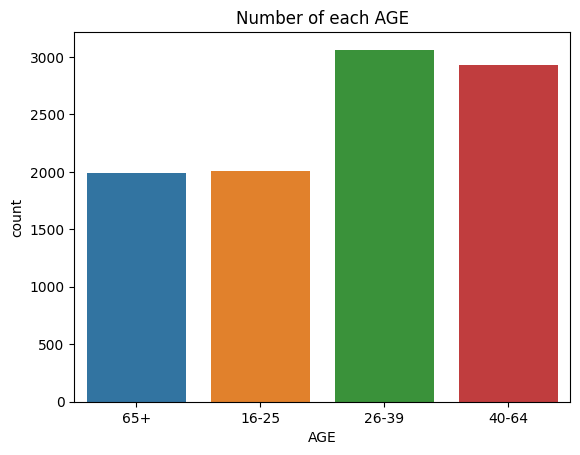

In [272]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='AGE')
ax.set_title('Number of each AGE');

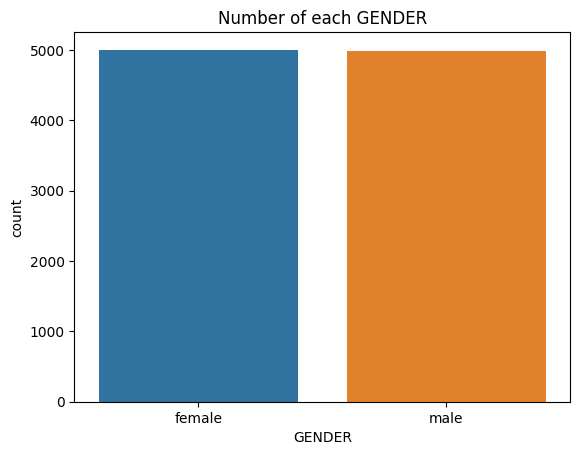

In [273]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='GENDER')
ax.set_title('Number of each GENDER');

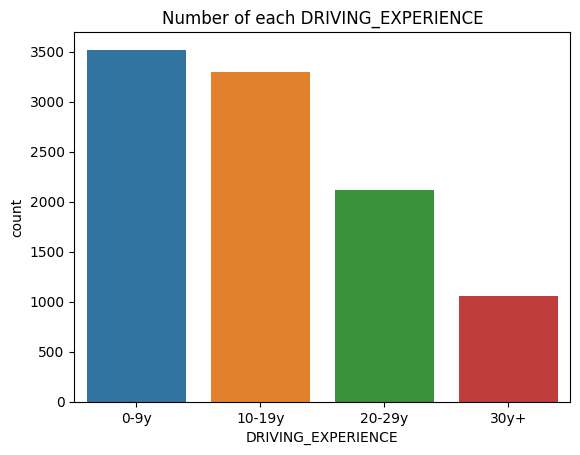

In [274]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='DRIVING_EXPERIENCE')
ax.set_title('Number of each DRIVING_EXPERIENCE');

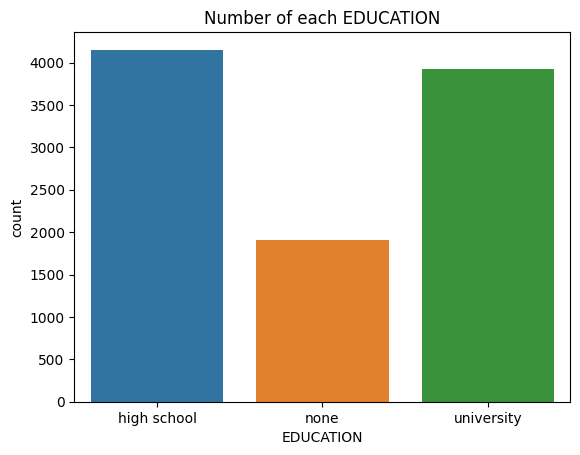

In [275]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='EDUCATION')
ax.set_title('Number of each EDUCATION');

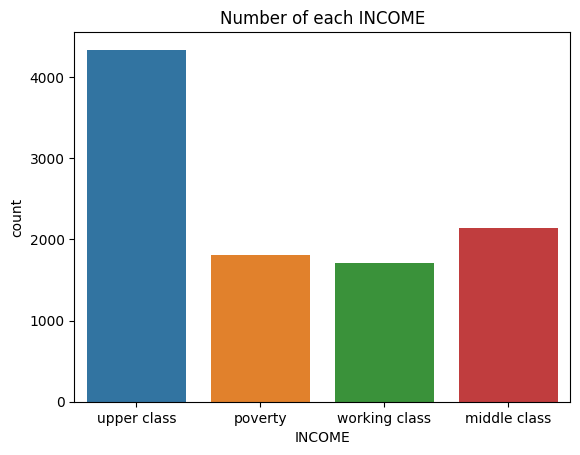

In [276]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='INCOME')
ax.set_title('Number of each INCOME');

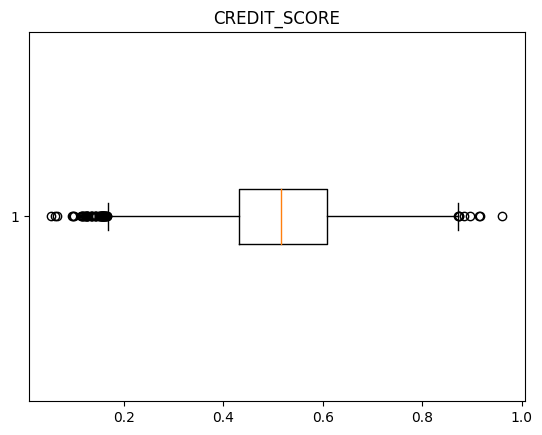

In [277]:
## Define a MatplotLib ax
fig, ax = plt.subplots()
ax.boxplot(EDA_Insurance_df['CREDIT_SCORE'], vert=False);

## Set the Title
ax.set_title('CREDIT_SCORE');

***Many outliers below 0.2 and above 0.9***

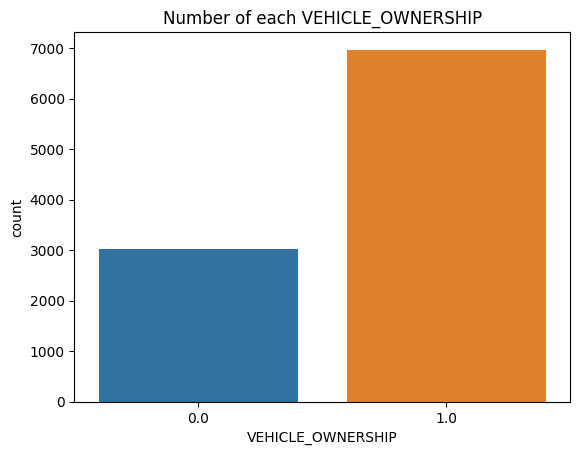

In [278]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='VEHICLE_OWNERSHIP')
ax.set_title('Number of each VEHICLE_OWNERSHIP');

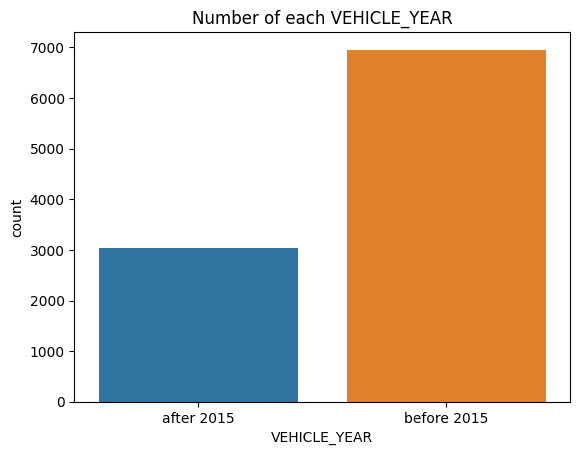

In [279]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='VEHICLE_YEAR')
ax.set_title('Number of each VEHICLE_YEAR');

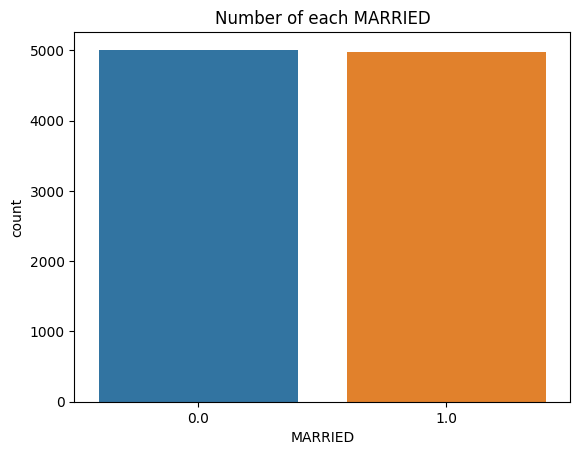

In [280]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='MARRIED')
ax.set_title('Number of each MARRIED');

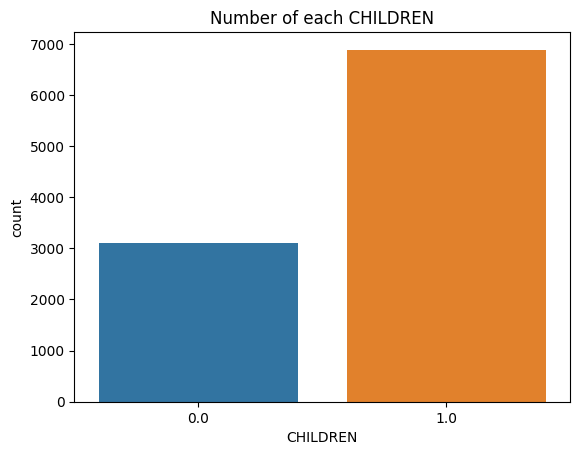

In [281]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='CHILDREN')
ax.set_title('Number of each CHILDREN');

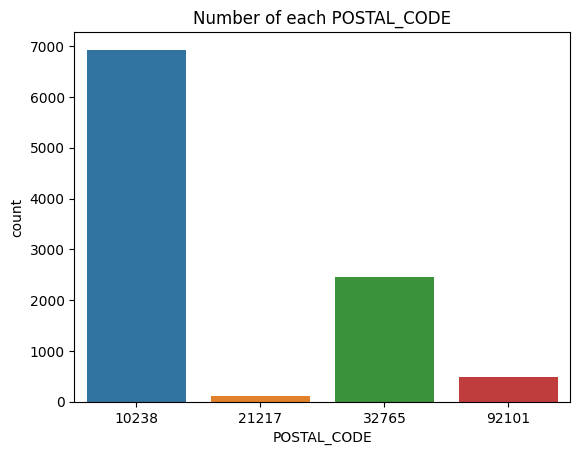

In [282]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='POSTAL_CODE')
ax.set_title('Number of each POSTAL_CODE');

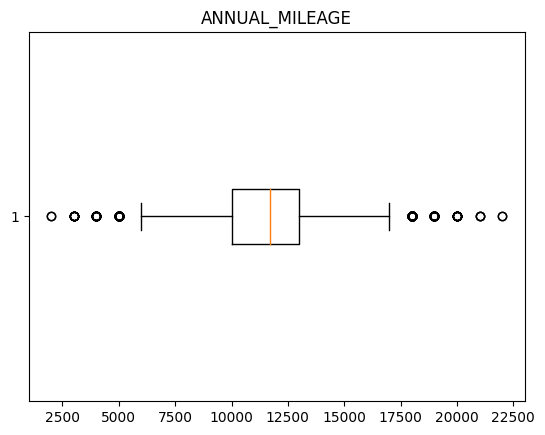

In [283]:
## Define a MatplotLib ax
fig, ax = plt.subplots()
ax.boxplot(EDA_Insurance_df['ANNUAL_MILEAGE'], vert=False);

## Set the Title
ax.set_title('ANNUAL_MILEAGE');

***Many Outliers below 5500 and above 17500***

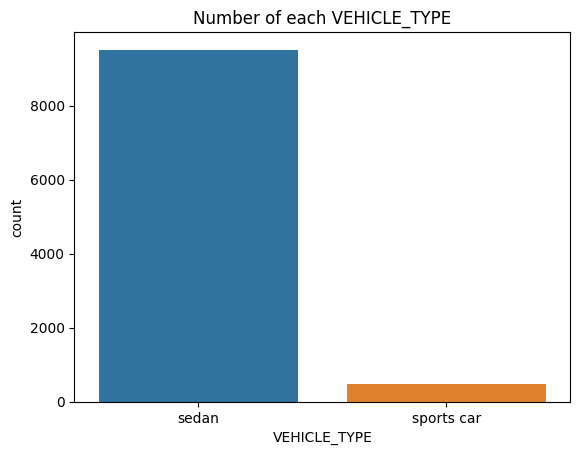

In [284]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='VEHICLE_TYPE')
ax.set_title('Number of each VEHICLE_TYPE');

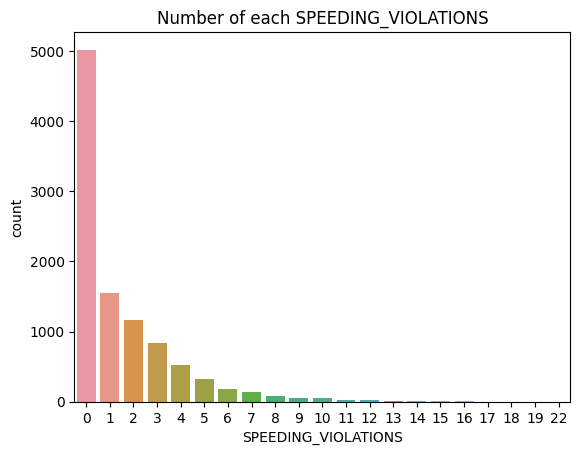

In [285]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='SPEEDING_VIOLATIONS')
ax.set_title('Number of each SPEEDING_VIOLATIONS');

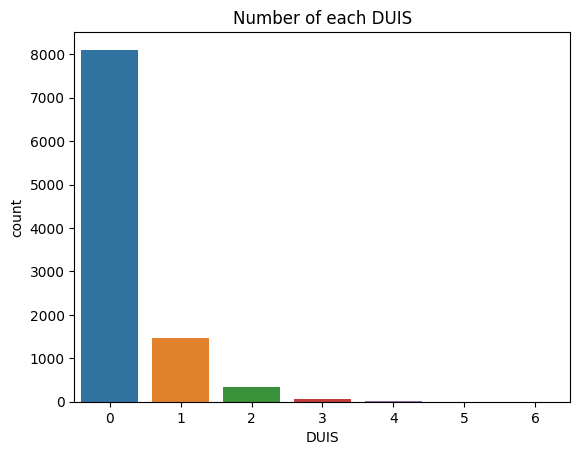

In [286]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='DUIS')
ax.set_title('Number of each DUIS');

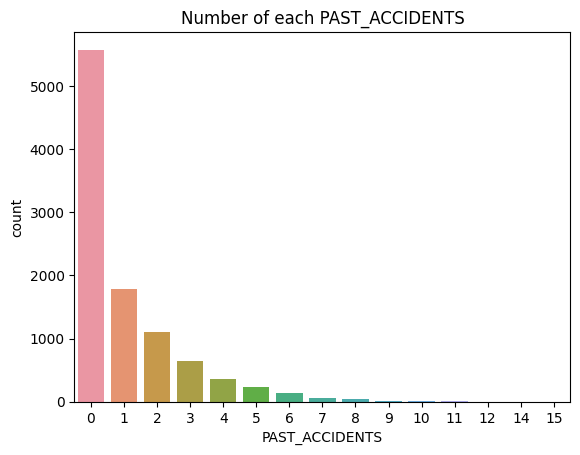

In [287]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='PAST_ACCIDENTS')
ax.set_title('Number of each PAST_ACCIDENTS');

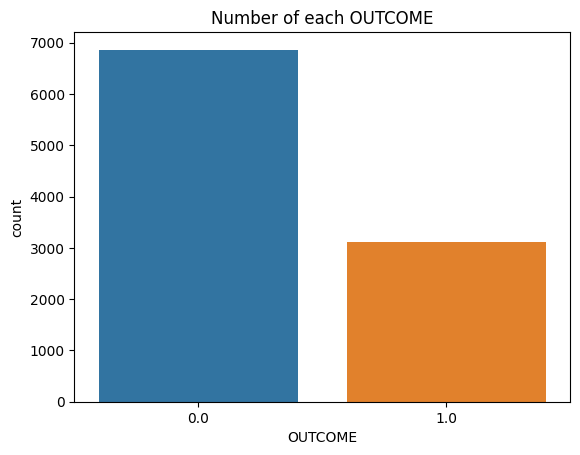

In [288]:
ax = sns.countplot(data=EDA_Insurance_df,
                   x='OUTCOME')
ax.set_title('Number of each OUTCOME');

# Part 3

###For this part of the project, you will continue your data exploration by:

<ipython-input-289-4320a9628f79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = EDA_Insurance_df.corr()


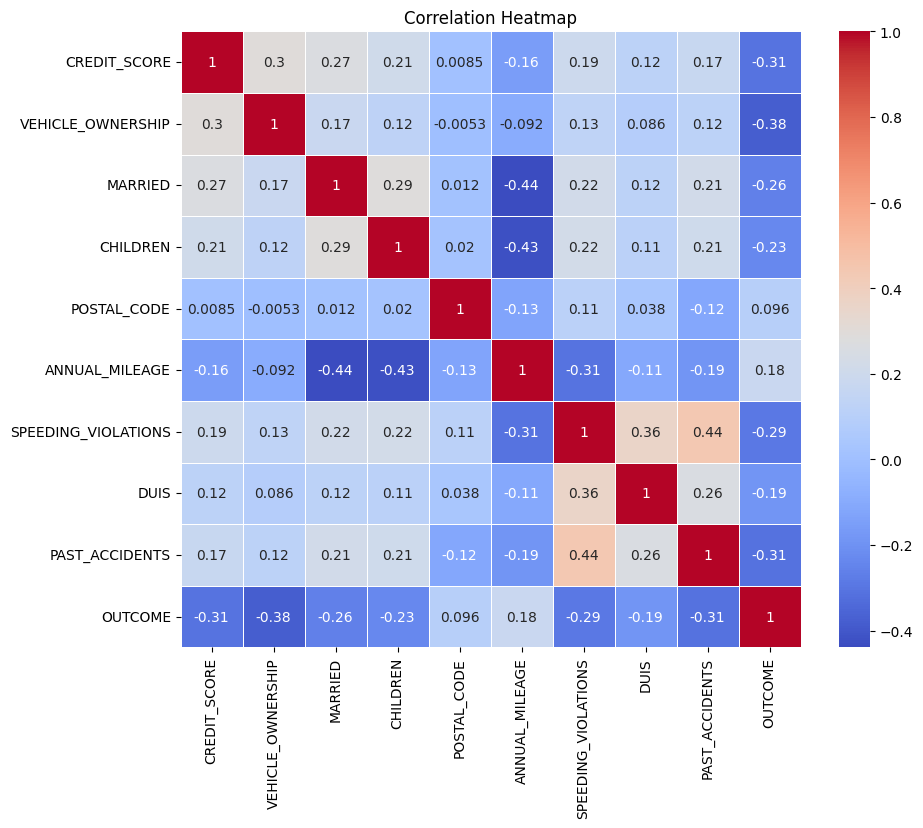

In [289]:
#Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
correlation = EDA_Insurance_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

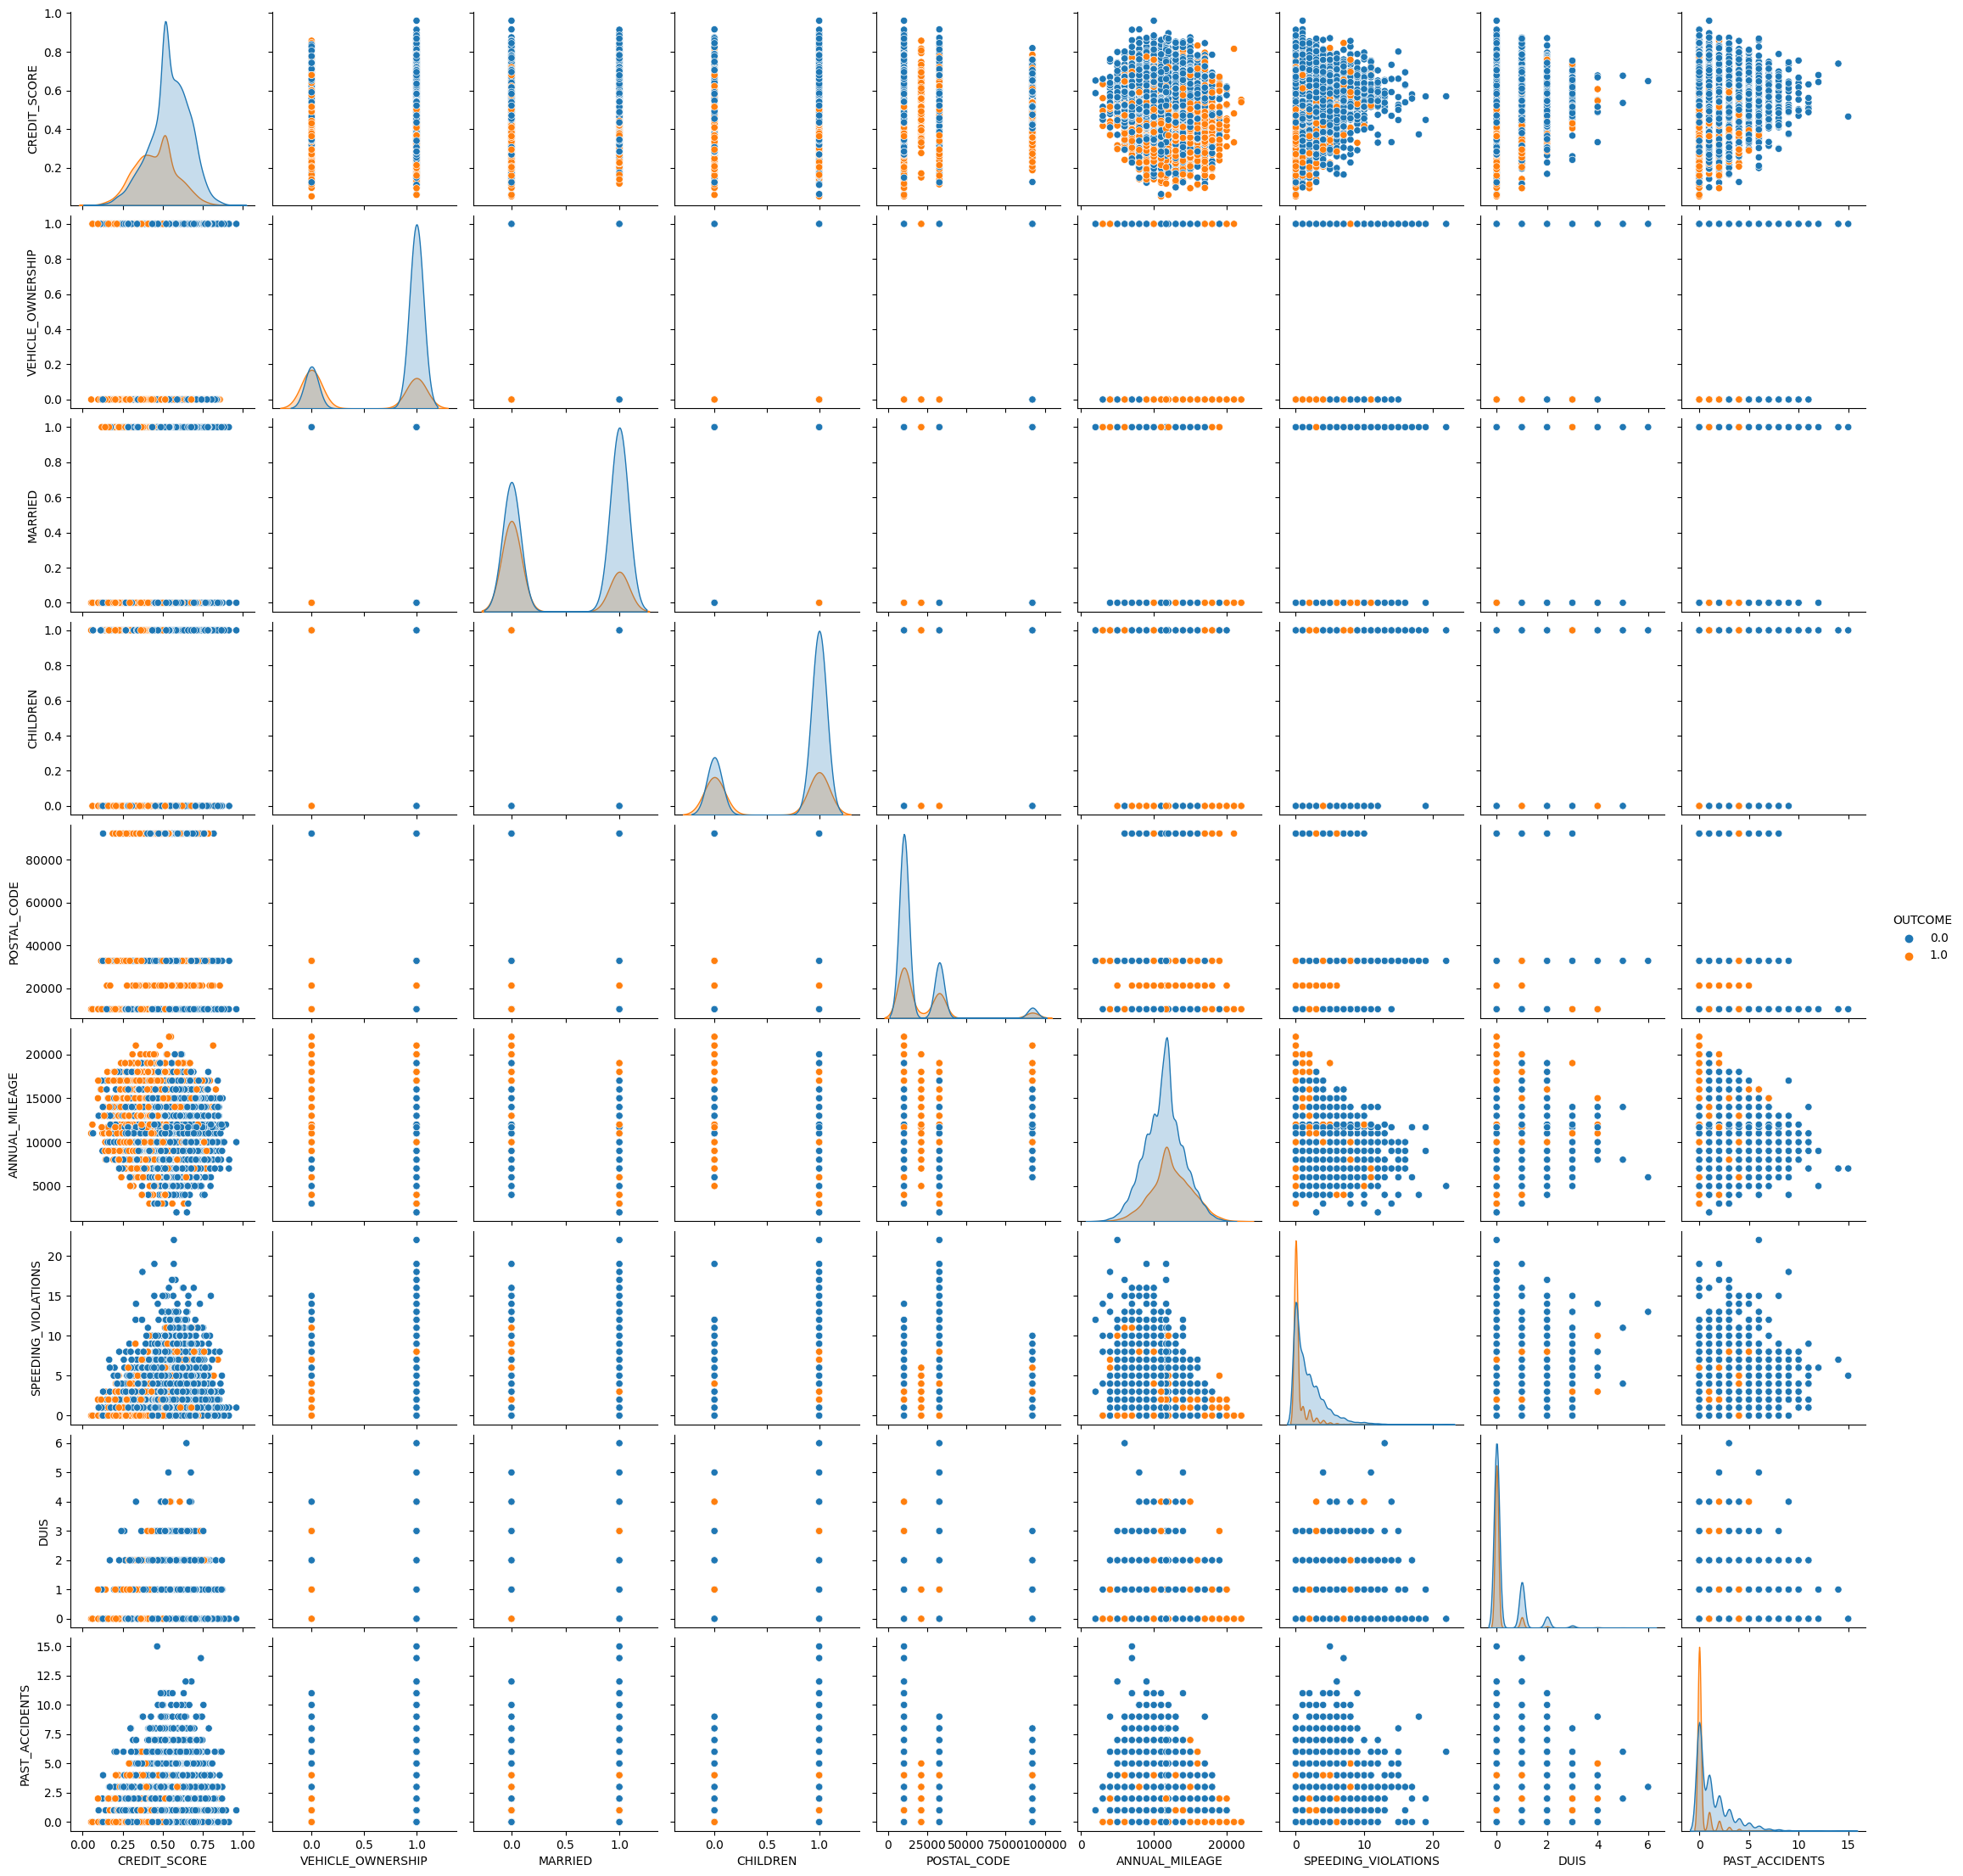

In [290]:
# Let's just show all the plots and pick our favorite
sns.pairplot(EDA_Insurance_df, hue='OUTCOME')

###Visuals


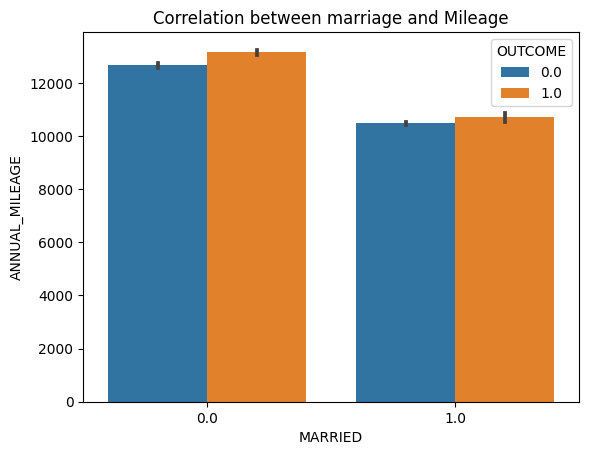

In [291]:
# Plot the data for Visual 1
plt.title("Correlation between marriage and Mileage")
ax = sns.barplot(x = 'MARRIED', y = 'ANNUAL_MILEAGE',hue = 'OUTCOME' , data = EDA_Insurance_df)

***This graph shows that when the customer is married, they tend to have far less mileage, I chose this visual as I beleive it is a key roleplayer in the outcome. I beleive it correlates to the outcome as married people have family responsibilities and will drive safe due to the fact that they have another persons life to consider when driving.***

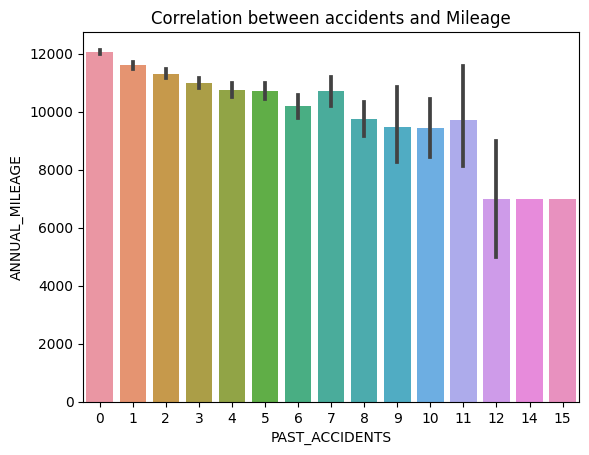

In [292]:
# Plot the data for Visual 2
plt.title("Correlation between accidents and Mileage")
ax = sns.barplot( y='ANNUAL_MILEAGE', x='PAST_ACCIDENTS', data = EDA_Insurance_df)

***From this visual we can see that the more accidents people are in, the less mielage they tend to have, this is due to the fact that bad drivers tend to drive less, but because they are bad drivers they get into more accidents.***

#Modeling

##Ensure that you complete the appropriate pre-processing steps.




In [293]:
#Identify the features (X) and target (y)
target = 'OUTCOME'
X = Insurance_df.drop(columns=[target]).copy()
Y = Insurance_df[target].copy()
#Split data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=42)

In [294]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_select = make_column_selector(dtype_include = 'number')

# Tuple
num_tuple = (num_pipeline, num_select)
print(num_tuple)

(Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())]), <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>)


In [295]:
# PREPROCESSING PIPELINE FOR ORDERED CATGEGORY DATA

#lists
AGE_list                = ['16-25','26-39','40-64','65+']
DRIVING_EXPERIENCE_list = ['0-9y','10-19y','20-29y','30y+']
EDUCATION_list          = ['none','high school','university']
INCOME_list             = ['poverty','working class','middle class','upper class']

#Transform
# I believe Ordinal Encoder is best used in this case as the data is Ordinal and therefor Ordinal Encoding is the best choice
ordinal = OrdinalEncoder(categories = [AGE_list,DRIVING_EXPERIENCE_list,EDUCATION_list,INCOME_list], handle_unknown='use_encoded_value',unknown_value = -1)
frequency_imputer = SimpleImputer(strategy='most_frequent')
scaler2 = StandardScaler()

# Pipeline
ord_pipeline = make_pipeline(frequency_imputer, ordinal, scaler2)

# Selector
ordinal_columns = ['AGE','DRIVING_EXPERIENCE','EDUCATION','INCOME']

#Tuple
ord_tuple = (ord_pipeline, ordinal_columns)
print(ord_tuple)

(Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['16-25', '26-39', '40-64', '65+'],
                                            ['0-9y', '10-19y', '20-29y',
                                             '30y+'],
                                            ['none', 'high school',
                                             'university'],
                                            ['poverty', 'working class',
                                             'middle class', 'upper class']],
                                handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('standardscaler', StandardScaler())]), ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME'])


In [296]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA

# Save list of nominal column names
nominal_cols = X_train.select_dtypes('object').drop(columns=ordinal_columns).columns

# Transformers
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
# I believe One-Hot Encoding is best used in this case as the data is Nominal and therefor Nominal Encoding is the best choice
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Pipeline
nom_pipeline = make_pipeline(missing_imputer , ohe)

# Tuple
ohe_tuple = (nom_pipeline, nominal_cols)
print(ohe_tuple)

(Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))


In [297]:
# Transformer
preprocessor = make_column_transformer(num_tuple,ord_tuple,ohe_tuple,remainder = 'passthrough')

## Fit and evaluate multiple types of models on your data.

### Model 1 - KNeighborsClassifier

In [298]:
kn = KNeighborsClassifier()
kn_pipe = make_pipeline(preprocessor, kn)
kn_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [299]:
# Predictions
%%time
kn_train_preds = kn_pipe.predict(X_train)
kn_test_preds  = kn_pipe.predict(X_test)

CPU times: user 1.35 s, sys: 22.5 ms, total: 1.37 s
Wall time: 963 ms


In [300]:
# Reports
print('Train')
print(classification_report(Y_train, kn_train_preds))
print('Test')
print(classification_report(Y_test, kn_test_preds))

Train
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      5148
         1.0       0.79      0.77      0.78      2343

    accuracy                           0.87      7491
   macro avg       0.84      0.84      0.84      7491
weighted avg       0.86      0.87      0.86      7491

Test
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1716
         1.0       0.70      0.68      0.69       781

    accuracy                           0.81      2497
   macro avg       0.78      0.77      0.78      2497
weighted avg       0.81      0.81      0.81      2497



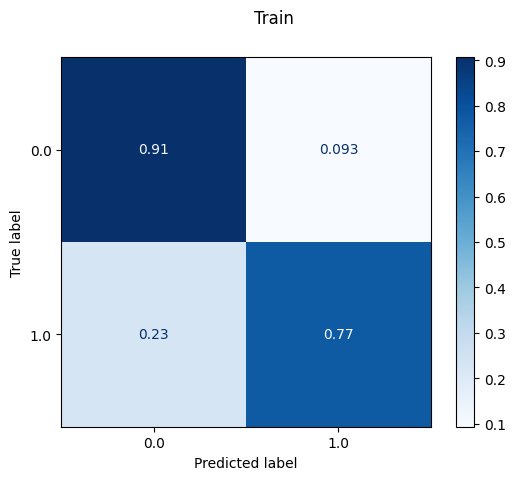

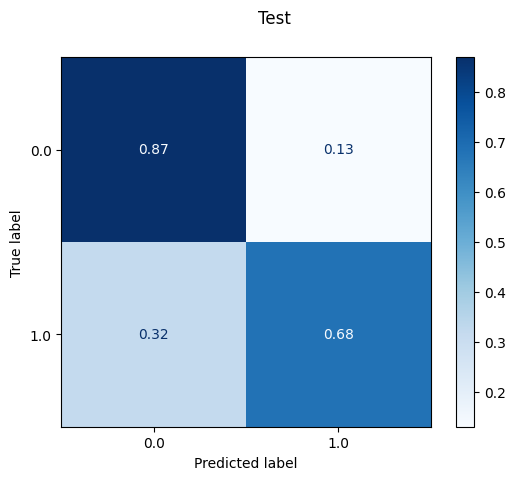

In [301]:
ConfusionMatrixDisplay.from_predictions(Y_train, kn_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(Y_test, kn_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

In [302]:
kn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     Ordi...
                                                                    unknown_value=-1)),
           

In [303]:
# Create parameters to use
params = {'kneighborsclassifier__n_neighbors': range(1,20) , 'kneighborsclassifier__weights' : ['distance','uniform'], 'kneighborsclassifier__leaf_size': [10,20,30,40,50]}

#Tune hyperparameters
kn_temp = GridSearchCV(kn_pipe,params)
kn_temp.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Sim...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [10, 20, 30, 40,
                                                             50],
                         'kneighborsclassifier__n_neighbors': range(1, 20),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [304]:
kn_best = kn_temp.best_estimator_
# Predictions
kn_train_preds = kn_best.predict(X_train)
kn_test_preds  = kn_best.predict(X_test)

In [305]:
# Reports
print('Train')
print(classification_report(Y_train, kn_train_preds))
print('Test')
print(classification_report(Y_test, kn_test_preds))

Train
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5148
         1.0       1.00      1.00      1.00      2343

    accuracy                           1.00      7491
   macro avg       1.00      1.00      1.00      7491
weighted avg       1.00      1.00      1.00      7491

Test
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1716
         1.0       0.74      0.70      0.72       781

    accuracy                           0.83      2497
   macro avg       0.80      0.79      0.80      2497
weighted avg       0.83      0.83      0.83      2497



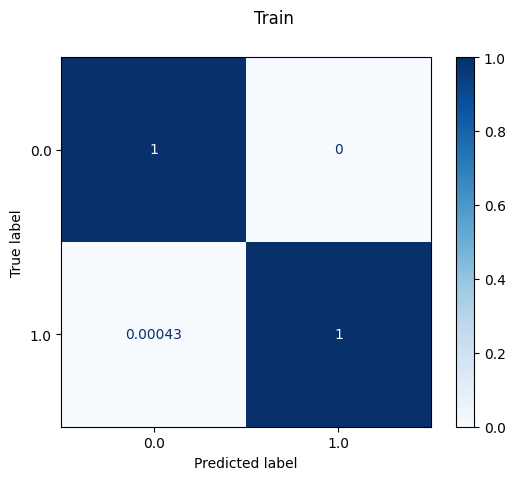

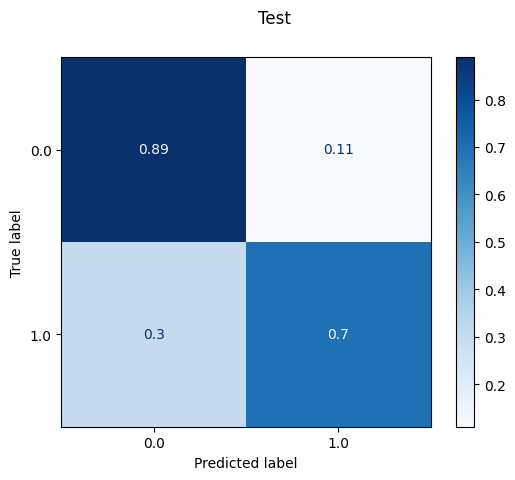

In [306]:
ConfusionMatrixDisplay.from_predictions(Y_train, kn_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(Y_test, kn_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

### Model 2 - DecisionTreeClassifier

In [307]:
dt = DecisionTreeClassifier()
dt_pipe = make_pipeline(preprocessor, dt)
dt_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [308]:
# Predictions
%%time
dt_train_preds = dt_pipe.predict(X_train)
dt_test_preds  = dt_pipe.predict(X_test)

CPU times: user 57.8 ms, sys: 984 µs, total: 58.8 ms
Wall time: 60.2 ms


In [309]:
# Reports
print('Train')
print(classification_report(Y_train, dt_train_preds))
print('Test')
print(classification_report(Y_test, dt_test_preds))

Train
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5148
         1.0       1.00      1.00      1.00      2343

    accuracy                           1.00      7491
   macro avg       1.00      1.00      1.00      7491
weighted avg       1.00      1.00      1.00      7491

Test
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1716
         1.0       0.67      0.71      0.69       781

    accuracy                           0.80      2497
   macro avg       0.77      0.77      0.77      2497
weighted avg       0.80      0.80      0.80      2497



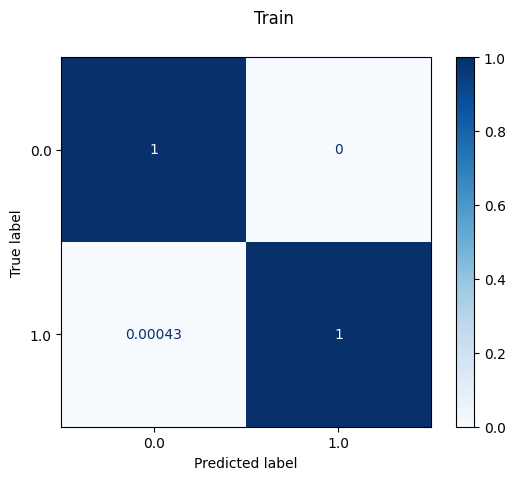

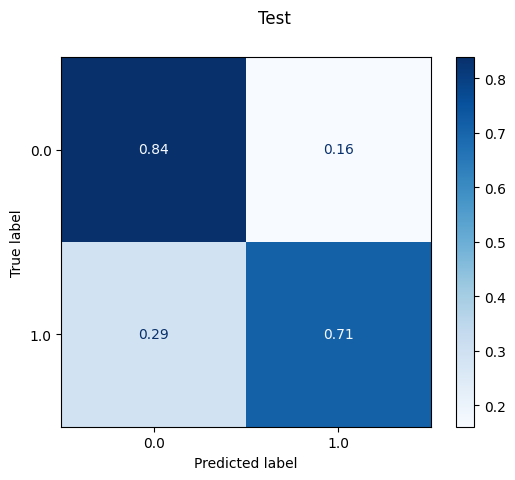

In [310]:
ConfusionMatrixDisplay.from_predictions(Y_train, dt_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(Y_test, dt_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

In [311]:
dt_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     Ordi...
                                                                    unknown_value=-1)),
           

In [312]:
# Create parameters to use
params = {'decisiontreeclassifier__max_features': range(1,10), 'decisiontreeclassifier__min_samples_leaf' : range(1,10)}

#Tune hyperparameters
dt_temp = GridSearchCV(dt_pipe,params)
dt_temp.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Sim...
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_features': range(1, 10),
                         'decisiontreeclassifier__min_samples_leaf': range(1, 10)})

In [313]:
dt_best = dt_temp.best_estimator_
# Predictions
dt_train_preds = dt_best.predict(X_train)
dt_test_preds  = dt_best.predict(X_test)

In [314]:
# Reports
print('Train')
print(classification_report(Y_train, dt_train_preds))
print('Test')
print(classification_report(Y_test, dt_test_preds))

Train
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      5148
         1.0       0.79      0.75      0.77      2343

    accuracy                           0.86      7491
   macro avg       0.84      0.83      0.83      7491
weighted avg       0.86      0.86      0.86      7491

Test
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1716
         1.0       0.71      0.66      0.69       781

    accuracy                           0.81      2497
   macro avg       0.78      0.77      0.78      2497
weighted avg       0.81      0.81      0.81      2497



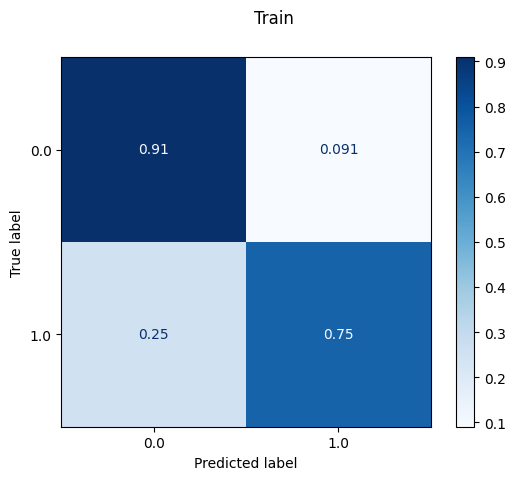

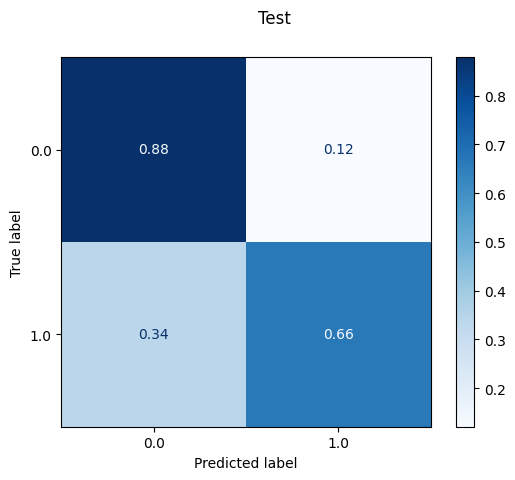

In [315]:
ConfusionMatrixDisplay.from_predictions(Y_train, dt_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(Y_test, dt_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

### Model 3 - LogisticRegression

In [316]:
lr = LogisticRegression()
lr_pipe = make_pipeline(preprocessor, lr)
lr_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [317]:
# Predictions
%%time
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds  = lr_pipe.predict(X_test)

CPU times: user 67.5 ms, sys: 35.1 ms, total: 103 ms
Wall time: 73 ms


In [318]:
# Reports
print('Train')
print(classification_report(Y_train, lr_train_preds))
print('Test')
print(classification_report(Y_test, lr_test_preds))

Train
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5148
         1.0       0.76      0.73      0.74      2343

    accuracy                           0.84      7491
   macro avg       0.82      0.81      0.82      7491
weighted avg       0.84      0.84      0.84      7491

Test
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1716
         1.0       0.77      0.74      0.75       781

    accuracy                           0.85      2497
   macro avg       0.82      0.82      0.82      2497
weighted avg       0.85      0.85      0.85      2497



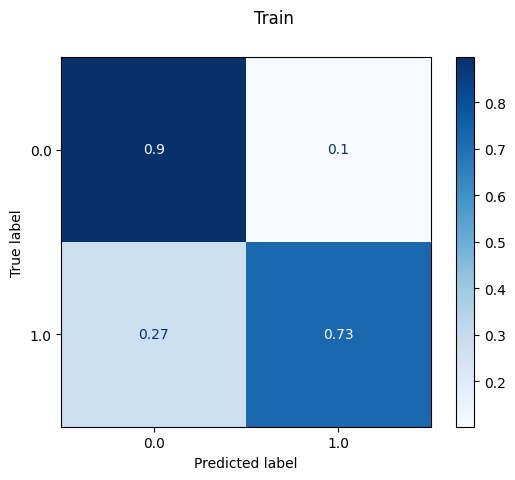

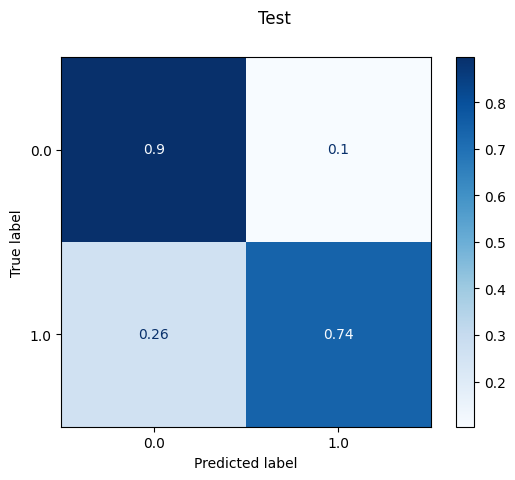

In [319]:
ConfusionMatrixDisplay.from_predictions(Y_train, lr_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(Y_test, lr_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

In [320]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     Ordi...
                                                                    unknown_value=-1)),
           

In [321]:
# Create parameters to use
params = {'logisticregression__C': [0.001, 0.01 , 0.1 , 1 , 10 , 100 , 1000] , 'logisticregression__penalty': ['l1', 'l2'],'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

#Tune hyperparameters
lr_temp = GridSearchCV(lr_pipe,params)
lr_temp.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Sim...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag',
                                                        'saga']})

In [322]:
lr_best = lr_temp.best_estimator_
# Predictions
lr_train_preds = lr_best.predict(X_train)
lr_test_preds  = lr_best.predict(X_test)

In [323]:
# Reports
print('Train')
print(classification_report(Y_train, lr_train_preds))
print('Test')
print(classification_report(Y_test, lr_test_preds))

Train
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5148
         1.0       0.76      0.73      0.74      2343

    accuracy                           0.84      7491
   macro avg       0.82      0.81      0.82      7491
weighted avg       0.84      0.84      0.84      7491

Test
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1716
         1.0       0.76      0.74      0.75       781

    accuracy                           0.85      2497
   macro avg       0.82      0.82      0.82      2497
weighted avg       0.85      0.85      0.85      2497



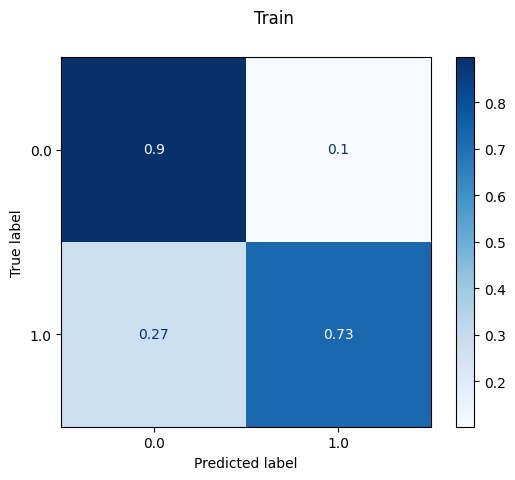

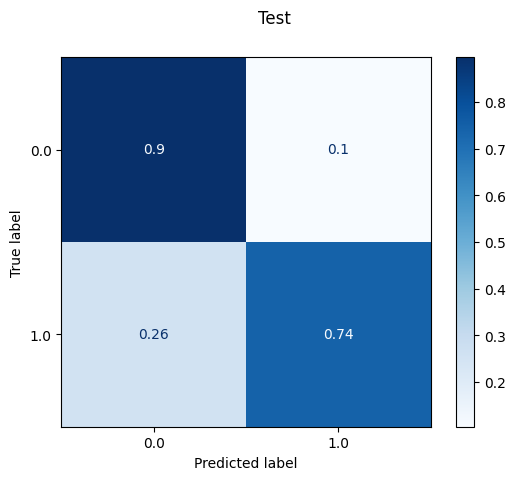

In [324]:
ConfusionMatrixDisplay.from_predictions(Y_train, lr_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(Y_test, lr_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

## Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results.

### Model 1 - KNeighborsClassifier with PCA

In [325]:
pca = PCA()
kn_pca_pipe = make_pipeline(preprocessor, pca , kn)
kn_pca_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))])),
                ('pca', PCA()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [326]:
# Predictions
%%time
kn_pca_train_preds = kn_pca_pipe.predict(X_train)
kn_pca_test_preds  = kn_pca_pipe.predict(X_test)

CPU times: user 1.47 s, sys: 139 ms, total: 1.61 s
Wall time: 1.1 s


In [327]:
# Reports
print('Train')
print(classification_report(Y_train, kn_pca_train_preds))
print('Test')
print(classification_report(Y_test, kn_pca_test_preds))

Train
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      5148
         1.0       0.79      0.77      0.78      2343

    accuracy                           0.87      7491
   macro avg       0.84      0.84      0.84      7491
weighted avg       0.86      0.87      0.86      7491

Test
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1716
         1.0       0.70      0.68      0.69       781

    accuracy                           0.81      2497
   macro avg       0.78      0.77      0.78      2497
weighted avg       0.81      0.81      0.81      2497



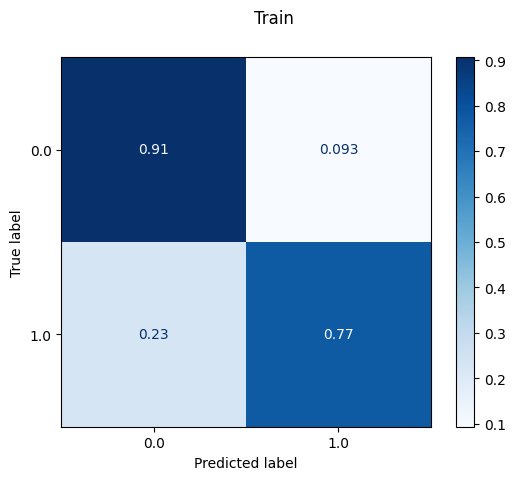

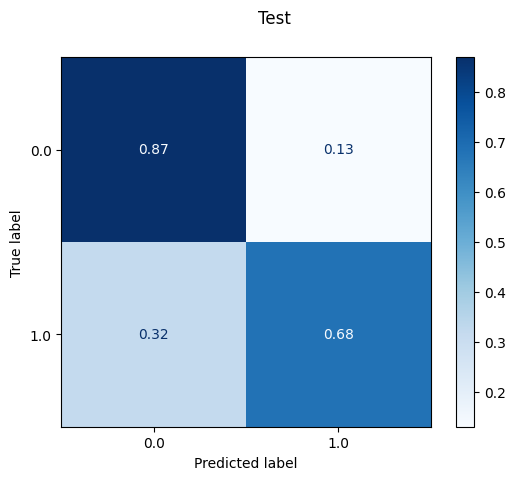

In [328]:
ConfusionMatrixDisplay.from_predictions(Y_train, kn_pca_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(Y_test, kn_pca_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

### Model 2 - DecisionTreeClassifier with PCA

In [329]:
dt_pca_pipe = make_pipeline(preprocessor, pca, dt)
dt_pca_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))])),
                ('pca', PCA()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [330]:
# Predictions
%%time
dt_pca_train_preds = dt_pca_pipe.predict(X_train)
dt_pca_test_preds  = dt_pca_pipe.predict(X_test)

CPU times: user 82.3 ms, sys: 32.9 ms, total: 115 ms
Wall time: 77.1 ms


In [331]:
# Reports
print('Train')
print(classification_report(Y_train, dt_pca_train_preds))
print('Test')
print(classification_report(Y_test, dt_pca_test_preds))

Train
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5148
         1.0       1.00      1.00      1.00      2343

    accuracy                           1.00      7491
   macro avg       1.00      1.00      1.00      7491
weighted avg       1.00      1.00      1.00      7491

Test
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      1716
         1.0       0.62      0.65      0.64       781

    accuracy                           0.77      2497
   macro avg       0.73      0.73      0.73      2497
weighted avg       0.77      0.77      0.77      2497



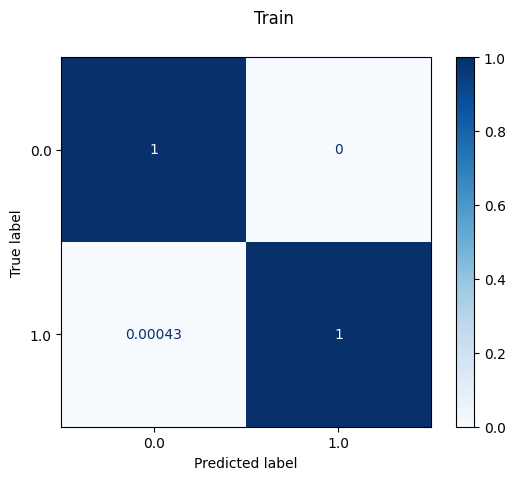

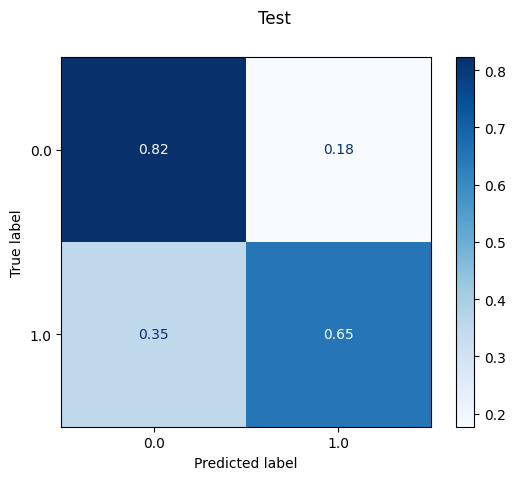

In [332]:
ConfusionMatrixDisplay.from_predictions(Y_train, dt_pca_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(Y_test, dt_pca_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

### Model 3 - LogisticRegression with PCA

In [333]:
lr_pca_pipe = make_pipeline(preprocessor, pca, lr)
lr_pca_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9545082ef0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))])),
                ('pca', PCA()), ('logisticregression', LogisticRegression())])

In [334]:
# Predictions
%%time
lr_pca_train_preds = lr_pca_pipe.predict(X_train)
lr_pca_test_preds  = lr_pca_pipe.predict(X_test)

CPU times: user 98.5 ms, sys: 13.9 ms, total: 112 ms
Wall time: 125 ms


In [335]:
# Reports
print('Train')
print(classification_report(Y_train, lr_pca_train_preds))
print('Test')
print(classification_report(Y_test, lr_pca_test_preds))

Train
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5148
         1.0       0.76      0.73      0.74      2343

    accuracy                           0.84      7491
   macro avg       0.82      0.81      0.82      7491
weighted avg       0.84      0.84      0.84      7491

Test
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1716
         1.0       0.77      0.74      0.75       781

    accuracy                           0.85      2497
   macro avg       0.82      0.82      0.82      2497
weighted avg       0.85      0.85      0.85      2497



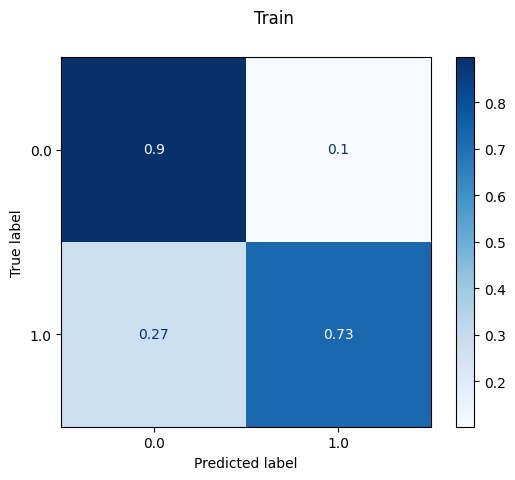

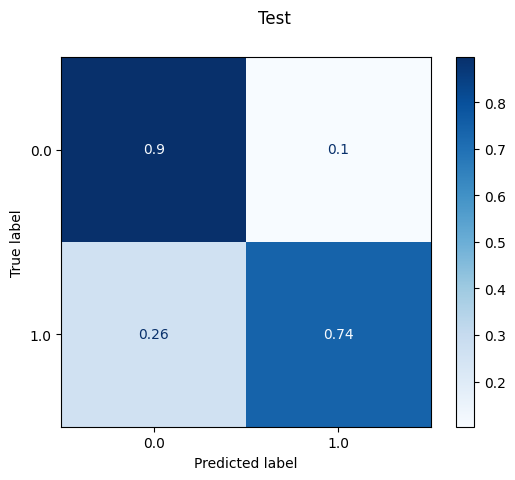

In [336]:
ConfusionMatrixDisplay.from_predictions(Y_train, lr_pca_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(Y_test, lr_pca_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

## Choose your "production" model and justify this decision using the metrics most important to your business problem.

My production model would be the LogisticRegression with PCA, 85% accuracy was the highest score I could achieve and due to the PCA it was also very fast. Due to the fact that insurance systems ussualy contain very large amounts of data, PCA would help speed up the process.